In [153]:
import numpy as np
from fbm import FBM
import matplotlib.pyplot as plt

In [154]:
# initialise path
n = 100
# f = FBM(n=n-1, hurst=0.97)
# path = f.fbm()
l = np.linspace(-np.pi, np.pi, n)
coef = np.random.randn(10)*5
path = np.sum(np.sin(np.outer(coef, l)), axis=0)

In [155]:
# fft
# return both positive and negative coefficients
idx = 40
fft_coef = np.fft.fft(path)
fft_coef1 = fft_coef[:idx*2]
fft_rough_path1 = np.fft.ifft(fft_coef, n=idx*2)
fft_coef2 = np.zeros_like(fft_coef)
fft_coef2[:idx*2] = fft_coef1
fft_rough_path2 = np.fft.ifft(fft_coef2)

In [156]:
# rfft
rfft_coef = np.fft.rfft(path)
rfft_coef1 = rfft_coef[:idx]
rfft_rough_path1 = np.fft.irfft(rfft_coef, n=idx)
rfft_coef2 = np.zeros_like(rfft_coef)
rfft_coef2[:idx] = rfft_coef1
rfft_rough_path2 = np.fft.irfft(rfft_coef2)

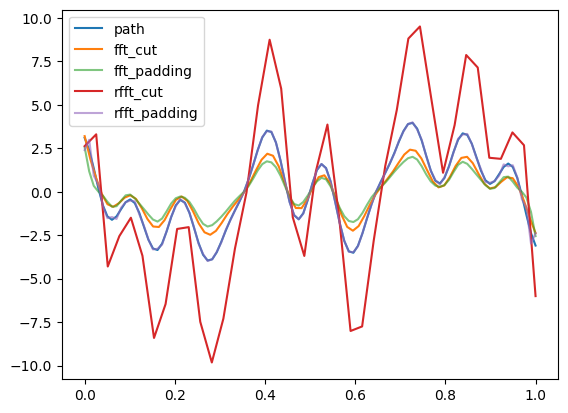

In [157]:
plt.plot(np.linspace(0, 1, len(path)), path, label='path')
plt.plot(np.linspace(0, 1, len(fft_rough_path1)), fft_rough_path1, label='fft_cut')
plt.plot(np.linspace(0, 1, len(fft_rough_path2)), fft_rough_path2, label='fft_padding', alpha=0.6)
plt.plot(np.linspace(0, 1, len(rfft_rough_path1)), rfft_rough_path1, label='rfft_cut')
plt.plot(np.linspace(0, 1, len(rfft_rough_path2)), rfft_rough_path2, label='rfft_padding', alpha=0.6)
plt.legend()

In [158]:
fft_coef.shape

(100,)

In [159]:
print(np.imag(rfft_coef))
rfft_coef.shape

[  0.          78.6340679   54.78375374 -60.88683117  32.12074713
  -2.49981947 -55.05374846  36.69191151  -4.13655884  12.67801019
 -45.85427564 -18.20973872 -13.05104983 -10.59759226  -9.0631992
  -7.97024496  -7.13143696  -6.45610374  -5.89400702  -5.41457526
  -4.9978827   -4.63024591  -4.30187554  -4.0055341   -3.73572448
  -3.48817641  -3.25950874  -3.04699991  -2.84842764  -2.66195424
  -2.48604267  -2.3193942   -2.16090103  -2.00961004  -1.86469444
  -1.72543152  -1.5911848   -1.46138974  -1.33554204  -1.21318804
  -1.09391678  -0.97735332  -0.86315308  -0.75099703  -0.64058756
  -0.5316448   -0.42390342  -0.31710977  -0.21101925  -0.10539388
   0.        ]


(51,)

To conclude, one can extract the first few leading terms of a path by letting the last few coefficient to zero, instead of removing it.

### Convergence check
Verify the error bound
\begin{equation}
    \max_{-\pi<x<\pi}|f(x)-S_n(x)|\leq\sum_{j=n+1}^\infty(|a_j|+|b_j|),
\end{equation}
where $S_n$ denotes Fourier series approximation, $a$ and $b$ are coefficients of $\cos$ and $\sin$

In [160]:
np.max(np.abs(path-rfft_rough_path2))

0.7052363370716503

In [161]:
res_coef = rfft_coef[idx:]
np.sum(np.abs(np.real(res_coef))+np.abs(np.imag(res_coef)))

42.853678487560714